<a href="https://colab.research.google.com/github/GabeTurtles/Office-Solutions-Data-Analysis/blob/main/Office_Solutions_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gabryl Reyes
BUS4 110A
OFFICE SOLUTIONS PROJECT 1**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.ExcelFile('/content/TableauSalesData.xlsx')
SalesData = df.parse("Orders")
#print(SalesData.columns)
#display(SalesData.head(20))

In [ ]:
StateCatProfitSales = SalesData[['Category','State','Profit','Sales']]
TotStateCatProfitSales = StateCatProfitSales.groupby(by=['Category','State']).sum()
PositiveTotStateProfitSales = TotStateCatProfitSales.loc[TotStateCatProfitSales['Profit'] < 0]
display(PositiveTotStateProfitSales)

Profit       Sales
Category        State                                 
Furniture       Arizona         -2744.9228  13525.2910
                Colorado        -2683.1342  13243.0370
                Florida         -2254.9807  22987.0380
                Illinois        -9076.2894  28274.5220
                North Carolina  -3486.4633  15155.4840
                Ohio            -4206.3212  24199.1450
                Oregon          -1487.5769   6338.1300
                Pennsylvania    -7196.7199  39354.9310
                Tennessee       -2208.6291  13506.7320
                Texas          -10436.1419  60593.2918
                West Virginia     -76.9536    673.3440
Office Supplies Arizona          -795.5030  10005.8250
                Colorado         -373.1392   7898.7520
                Florida         -1675.1258  19518.6340
                Illinois        -8354.1568  19907.9060
                North Carolina   -421.1449  14364.5610
                Ohio             -115.1153  18382.9990
                Pennsylvania    -5172.0188  34941.7140
                Tennessee       -3199.0982  12347.8580
                Texas          -18584.6434  44490.5300
Technology      Colorado        -3471.5845  10966.3290
                North Carolina  -3583.3040  26083.1190
                Ohio           -12649.9401  35675.9920
                Pennsylvania    -3191.2216  42215.2690

In [ ]:
CatSubcat = SalesData[['Category','Segment','Profit','Sales','Discount']]
TotCatSubcat = CatSubcat.groupby(by=['Category','Segment']).aggregate({'Profit' : ['sum'], 'Sales' : ['sum'], 'Discount' : ['mean']}).round(2)
display(TotCatSubcat)

Profit      Sales Discount
                                  sum        sum     mean
Category        Segment                                  
Furniture       Consumer      6991.08  391049.31     0.18
                Corporate     7584.82  229019.79     0.17
                Home Office   3875.38  121930.70     0.16
Office Supplies Consumer     56330.32  363952.14     0.16
                Corporate    40227.32  230676.46     0.16
                Home Office  25933.16  124418.43     0.15
Technology      Consumer     70797.81  406399.90     0.13
                Corporate    44167.00  246450.12     0.13
                Home Office  30490.14  183304.02     0.13

In [ ]:
OverallProfitSalesCat = SalesData[['Category','Profit','Sales']]
TotalOverallProfitSalesCat = SalesData.groupby('Category').sum()
TotalOverallProfitSalesCat = TotalOverallProfitSalesCat[['Profit','Sales']]
print("Category Total Profit and Sales")
print('*'*35)
display(TotalOverallProfitSalesCat)

Category Total Profit and Sales
***********************************


,Profit,Sales
Category,,
Furniture,18451.2728,741999.7953
Office Supplies,122490.8008,719047.0320
Technology,145454.9481,836154.0330


In [ ]:
CatProducts = SalesData[['Category','Product Name','Profit','Sales']]
Cats = CatProducts.Category.unique()
for cat in Cats:
  FurnCatProducts = CatProducts.loc[CatProducts['Category'] == cat]
  TotalCatProducts = FurnCatProducts.groupby('Product Name').sum().sort_values('Profit', ascending = False)
  print('Top 5 products in ' + cat)
  print('*' * 40)
  display(TotalCatProducts.head(5))

In [ ]:
CatProducts = SalesData[['Category','Product Name','Profit','Sales']]
Cats = CatProducts.Category.unique()
for cat in Cats:
  FurnCatProducts = CatProducts.loc[CatProducts['Category'] == cat]
  TotalCatProducts = FurnCatProducts.groupby('Product Name').sum().sort_values('Profit', ascending = False)
  print('Bottom 5 products in ' + cat)
  print('*' * 40)
  display(TotalCatProducts.tail(5))

In [ ]:
CatDiscount = SalesData[['Category','Product Name','Discount']]
OverallCatAvgDiscount = pd.DataFrame()
Cats = CatDiscount.Category.unique()
for cat in Cats:
  CatAvgDiscount = CatDiscount.loc[CatDiscount['Category'] == cat]
  TotalCatProducts = CatAvgDiscount.groupby('Category').mean()
  OverallCatAvgDiscount = OverallCatAvgDiscount.append(TotalCatProducts)
print('Average discount rate of each category')
print('*' * 40) 
display(OverallCatAvgDiscount)

Average discount rate of each category
****************************************


,Discount
Category,
Furniture,0.173923
Technology,0.132323
Office Supplies,0.157285


In [ ]:
# Creates Category df with year column
YearOverallProfitSalesCat = SalesData.copy()
YearOverallProfitSalesCat['Year'] = YearOverallProfitSalesCat['Order Date'].dt.year
# Finds unique years and categories
Years = YearOverallProfitSalesCat.Year.unique()
Cats = YearOverallProfitSalesCat.Category.unique()
# Iterates over years to check sales/profit of each category for each year
# Displays bar graph of each year showing sales/profit of each category
for year in Years:
  OverallCatYear = YearOverallProfitSalesCat.loc[YearOverallProfitSalesCat['Year'] == year]
  RefinedOverallCatYear = OverallCatYear[['Category', 'Profit', 'Sales']]
  CatOverallSalesProfit = RefinedOverallCatYear.groupby('Category').sum().round().sort_values('Sales', ascending = False)
  print('Total profit and sales of each category in ' + str(year))
  display(CatOverallSalesProfit)
  print('*'*60)

Total profit and sales of each category in 2017


,Profit,Sales
Category,,
Technology,39774.0,226364.0
Furniture,6960.0,198901.0
Office Supplies,35061.0,183940.0


************************************************************
Total profit and sales of each category in 2018


,Profit,Sales
Category,,
Technology,50684.0,271731.0
Office Supplies,39737.0,246097.0
Furniture,3018.0,215387.0


************************************************************
Total profit and sales of each category in 2019


,Profit,Sales
Category,,
Technology,21493.0,175278.0
Furniture,5458.0,157193.0
Office Supplies,22593.0,151776.0


************************************************************
Total profit and sales of each category in 2020


,Profit,Sales
Category,,
Furniture,3015.0,170518.0
Technology,33504.0,162781.0
Office Supplies,25100.0,137233.0


************************************************************


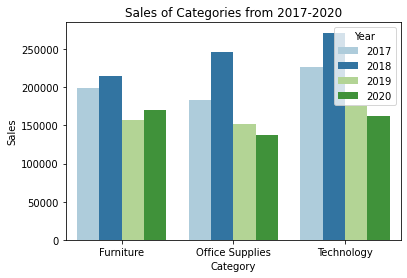

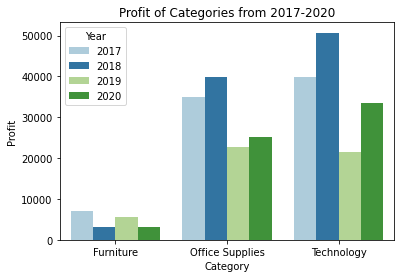

In [ ]:
# Creates Category df with year column
YearOverallProfitSalesCat = SalesData.copy()
YearOverallProfitSalesCat['Year'] = YearOverallProfitSalesCat['Order Date'].dt.year
# Finds unique years and categories
Years = YearOverallProfitSalesCat.Year.unique()
Cats = YearOverallProfitSalesCat.Category.unique()

df = pd.DataFrame()
# Iterates over years to check sales/profit of each category for each year
# Displays bar graph of each year showing sales/profit of each category
for year in Years:
  OverallCatYear = YearOverallProfitSalesCat.loc[YearOverallProfitSalesCat['Year'] == year]
  RefinedOverallCatYear = OverallCatYear[['Category', 'Profit', 'Sales','Year']]
  CatOverallSalesProfit = RefinedOverallCatYear.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum', 'Year':'mean'}).round().sort_values('Category')
  df = df.append(CatOverallSalesProfit)
df = df.reset_index()
df = df.sort_values('Category')
df['Year'] = df['Year'].astype(int)

salesbar = sns.barplot(data= df, x = 'Category', y = 'Sales', hue ='Year', palette = 'Paired').set(title = 'Sales of Categories from 2017-2020')
plt.show()
profitbar = sns.barplot(data= df, x = 'Category', y = 'Profit', hue ='Year', palette = 'Paired').set(title = 'Profit of Categories from 2017-2020')
plt.show()

In [ ]:
JustFurniture = SalesData.loc[SalesData['Category'] == 'Furniture']
RefinedJustFurniture = JustFurniture[['Product Name', 'Sales', 'Discount','Profit']]
JustFurnitureGrouped = RefinedJustFurniture.groupby('Product Name').aggregate({'Discount':'mean', 'Profit':'sum','Sales':'sum'}).round(2).sort_values('Sales', ascending = False)
HighestSalesJustFurniture = JustFurnitureGrouped.reset_index()
HighestSalesJustFurniture = HighestSalesJustFurniture.head(3)
display(HighestSalesJustFurniture)

,Product Name,Discount,Profit,Sales
0,HON 5400 Series Task Chairs for Big and Tall,0.20,0.00,21870.58
1,"Riverside Palais Royal Lawyers Bookcase, Royal...",0.23,-669.54,15610.97
2,Bretford Rectangular Conference Table Tops,0.25,-327.23,12995.29


In [ ]:
JustFurniture = SalesData.loc[SalesData['Category'] == 'Furniture']
RefinedJustFurniture = JustFurniture[['Product Name', 'Sales', 'Discount','Profit']]
JustFurnitureGrouped = RefinedJustFurniture.groupby('Product Name').aggregate({'Discount':'mean', 'Profit':'sum','Sales':'sum'}).round(2).sort_values('Profit', ascending = False)
JustFurnitureGrouped = JustFurnitureGrouped.reset_index()
HighestSalesJustFurniture = JustFurnitureGrouped.tail(3)
display(HighestSalesJustFurniture)

,Product Name,Discount,Profit,Sales
377,Balt Solid Wood Round Tables,0.20,-1201.06,6518.75
378,Bush Advantage Collection Racetrack Conference...,0.35,-1934.40,9544.72
379,Chromcraft Bull-Nose Wood Oval Conference Tabl...,0.28,-2876.12,9917.64


In [ ]:
JustFurniture = SalesData.loc[SalesData['Category'] == 'Furniture']
RefinedJustFurniture = JustFurniture[['Product Name', 'Sales', 'Quantity', 'Discount','Profit']]
JustFurnitureGrouped = RefinedJustFurniture.groupby('Product Name').sum().round(2).sort_values('Sales', ascending = False)
DiscountJustFurniture = JustFurnitureGrouped.loc[JustFurnitureGrouped['Discount'] > 1]
HighestJustFurniture = DiscountJustFurniture.head(7)
LowestJustFurniture = DiscountJustFurniture.tail(7)
display(LowestJustFurniture)

,Sales,Quantity,Discount,Profit
Product Name,,,,
"Global Wood Trimmed Manager's Task Chair, Khaki",4166.88,59,3.20,-503.12
"Bevis Round Conference Table Top, X-Base",2671.42,20,1.60,-519.94
"Tenex Chairmat w/ Average Lip, 45"" x 53""",2058.50,19,1.20,-529.76
Tenex Antistatic Computer Chair Mats,3317.01,25,1.40,-530.04
Bretford CR4500 Series Slim Rectangular Table,7242.77,29,2.10,-532.76
Bevis Rectangular Conference Tables,1007.26,13,1.90,-586.84
Hon Racetrack Conference Tables,3963.90,22,1.70,-598.52
"Chromcraft Bull-Nose Wood 48"" x 96"" Rectangular Conference Tables",4297.64,11,2.00,-611.59
Bestar Classic Bookcase,1897.81,31,2.52,-612.94
